In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
print("File di Google Drive:")
for file in os.listdir('/content/drive/MyDrive'):
    print(f"- {file}")

File di Google Drive:
- Colab Notebooks
- AI Kelompok Florencia
- LAP01_2359.docx
- UTS_CITRAMUTIA_2457201002359
- videopresentasiAI(KNN)
- UAS_Artificial_Intelligent_Genap_2025.gdoc
- UAS_PL_09_KasirPintar
- UAS2025_AI_2A_Citramutia
- UAS2A_GRAPHICDESIGN_CITRAMUTIA
- Classroom
- MUK JMP 2025.gdoc
- PemasaranDigital_2359CitraMutia(3A)
- Project Uts Multimedia
- UTS_2359
- LAPORAN ANALISIS BISNIS DAN STRATEGI DIGITAL MARKETING MCOMFFE COFFEE SHOP_2359.gdoc
- Proposal Analisis & Desain Sistem Informasi.pdf
- New app provider & New app API


In [ ]:
# Cari file CSV di seluruh Google Drive
import glob
csv_files = glob.glob('/content/drive/MyDrive/**/*.csv', recursive=True)
print("File CSV yang ditemukan:")
for file in csv_files:
    print(f"- {file}")

File CSV yang ditemukan:
- /content/drive/MyDrive/Colab Notebooks/AI_Class/spam.csv
- /content/drive/MyDrive/Colab Notebooks/AI_Class/20_newsgroup.csv
- /content/drive/MyDrive/Colab Notebooks/AI_Class/gender_classification.csv
- /content/drive/MyDrive/Colab Notebooks/AI_Class/KNN_project.csv
- /content/drive/MyDrive/Colab Notebooks/MachineLearning/iris_dataset.csv
- /content/drive/MyDrive/Colab Notebooks/MachineLearning/dataset_market_basket.csv
- /content/drive/MyDrive/Colab Notebooks/MachineLearning/datakelulusanmahasiswa.xlsx - Sheet1.csv


In [ ]:
import pandas as pd

# Gunakan path yang benar dari hasil pencarian Anda
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/datakelulusanmahasiswa.xlsx - Sheet1.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("📊 5 Baris Pertama Dataset:")
print(df.head())

print("\n🔍 Info Dataset:")
print(df.info())

print("\n❓ Missing Values:")
print(df.isnull().sum())

print("\n📏 Shape Dataset:")
print(df.shape)

📊 5 Baris Pertama Dataset:
                      NAMA JENIS KELAMIN STATUS MAHASISWA  UMUR  \
0           ANIK WIDAYANTI     PEREMPUAN          BEKERJA    28   
1  DWI HESTYNA PRIHASTANTY     PEREMPUAN        MAHASISWA    32   
2       MURYA ARIEF BASUKI     PEREMPUAN          BEKERJA    29   
3            NANIK SUSANTI     PEREMPUAN        MAHASISWA    27   
4        RIFKA ISTIQFARINA     PEREMPUAN          BEKERJA    29   

    STATUS NIKAH  IPS 1  IPS 2  IPS 3  IPS 4  IPS 5  IPS 6  IPS 7  IPS 8  \
0  BELUM MENIKAH   2.76   2.80   3.20   3.17   2.98   3.00   3.03    0.0   
1  BELUM MENIKAH   3.00   3.30   3.14   3.14   2.84   3.13   3.25    0.0   
2  BELUM MENIKAH   3.50   3.30   3.70   3.29   3.53   3.72   3.73    0.0   
3  BELUM MENIKAH   3.17   3.41   3.61   3.36   3.48   3.63   3.46    0.0   
4  BELUM MENIKAH   2.90   2.89   3.30   2.85   2.98   3.00   3.08    0.0   

   IPK  STATUS KELULUSAN  
0  3.07        TERLAMBAT  
1  3.17        TERLAMBAT  
2  3.54        TERLAMBAT  
3  3.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np # Add import for numpy, as np.unique was used without import.

# 1. Handle Missing Values (jika ada)
print("🔧 PREPROCESSING DATA")
print("Missing values sebelum handling:")
print(df.isnull().sum())

# Jika ada missing values, isi dengan median atau mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values setelah handling:")
print(df.isnull().sum())

# 2. Pisahkan features (X) dan target (y)
# Ganti 'Status_Kelulusan' dengan nama kolom target yang sesuai menjadi 'STATUS KELULUSAN'
X = df.drop('STATUS KELULUSAN', axis=1)  # Features
y = df['STATUS KELULUSAN']  # Target

print(f"\n🎯 Features shape: {X.shape}")
print(f"🎯 Target shape: {y.shape}")

# 3. Encoding data kategorikal
print("\n🔤 ENCODING DATA KATEGORIKAL")

# Encoding target (Label Encoding)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Target classes: {le.classes_}")
print(f"Target encoded: {np.unique(y_encoded)}")

# Encoding features kategorikal (OneHot Encoding)
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(f"Kolom kategorikal: {list(categorical_cols)}")
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
else:
    print("Tidak ada kolom kategorikal dalam features")

print(f"Shape setelah encoding: {X.shape}")

# 4. Feature Scaling (WAJIB untuk SVM)
print("\n⚖️ FEATURE SCALING")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Feature scaling selesai!")

# 5. Train-Test Split dengan berbagai rasio
print("\n📊 TRAIN-TEST SPLIT")

split_ratios = {
    '60:40': 0.4,
    '75:25': 0.25,
    '80:20': 0.2,
    '90:10': 0.1
}

for name, test_size in split_ratios.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=test_size, random_state=42, stratify=y_encoded
    )
    print(f"{name}: Train={X_train.shape[0]}, Test={X_test.shape[0]}")

🔧 PREPROCESSING DATA
Missing values sebelum handling:
NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64

Missing values setelah handling:
NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64

🎯 Features shape: (379, 14)
🎯 Target shape: (379,)

🔤 ENCODING DATA KATEGORIKAL
Target classes: ['TEPAT' 'TERLAMBAT']
Target encoded: [0 1]
Kolom kategorikal: ['NAMA', 'JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH']
Shap

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("🤖 TRAINING MODEL SVM")

# Gunakan split 80:20 untuk training (bisa ganti sesuai kebutuhan)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# 1. Hyperparameter Tuning
print("\n🎯 HYPERPARAMETER TUNING")

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['linear', 'rbf']
}

svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# 2. Training Model dengan Best Parameters
print("\n🚀 TRAINING MODEL FINAL")

# Model Linear
svm_linear = SVC(kernel='linear', C=grid_search.best_params_['C'], random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Model RBF
svm_rbf = SVC(kernel='rbf', C=grid_search.best_params_['C'],
              gamma=grid_search.best_params_['gamma'], random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# 3. Evaluasi Model
print("\n📊 EVALUASI MODEL")

def evaluate_model(name, y_true, y_pred):
    print(f"\n{'='*50}")
    print(f"📈 MODEL {name}")
    print(f"{'='*50}")

    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=le.classes_))

    return accuracy

# Evaluasi kedua model
acc_linear = evaluate_model("SVM LINEAR", y_test, y_pred_linear)
acc_rbf = evaluate_model("SVM RBF", y_test, y_pred_rbf)

# 4. Analisis Perbandingan Model
print("\n🔍 ANALISIS PERBANDINGAN MODEL")
print(f"Linear SVM Accuracy: {acc_linear:.4f}")
print(f"RBF SVM Accuracy: {acc_rbf:.4f}")

if acc_linear > acc_rbf:
    print("✅ Model Linear lebih baik")
    best_model = svm_linear
elif acc_rbf > acc_linear:
    print("✅ Model RBF lebih baik")
    best_model = svm_rbf
else:
    print("✅ Kedua model memiliki performa sama")
    best_model = svm_linear

print(f"\n🎯 Best Model: {best_model}")

🤖 TRAINING MODEL SVM
Training set: (303, 388)
Test set: (76, 388)

🎯 HYPERPARAMETER TUNING
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.8813114754098361

🚀 TRAINING MODEL FINAL

📊 EVALUASI MODEL

📈 MODEL SVM LINEAR
Accuracy: 0.8684

Confusion Matrix:
[[40  3]
 [ 7 26]]

Classification Report:
              precision    recall  f1-score   support

       TEPAT       0.85      0.93      0.89        43
   TERLAMBAT       0.90      0.79      0.84        33

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.87      0.87        76


📈 MODEL SVM RBF
Accuracy: 0.5658

Confusion Matrix:
[[43  0]
 [33  0]]

Classification Report:
              precision    recall  f1-score   support

       TEPAT       0.57      1.00      0.72        43
   TERLAMBAT       0.00      0.00      0.00        33

    accuracy                           0.57        76
   macro avg 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔍 INTERPRETASI MODEL

📊 FITUR PALING BERPENGARUH (Linear SVM):
                        feature  importance
386  STATUS MAHASISWA_MAHASISWA    0.402113
5                         IPS 5    0.174913
1                         IPS 1    0.137655
6                         IPS 6    0.130045
4                         IPS 4    0.115637
104     NAMA_DIANA LAILY FITHRI    0.101222
64      NAMA_ARIEF PRAM WAHYUDI    0.096302
115            NAMA_EDI JATMIKO    0.087634
262          NAMA_NANIK SUSANTI    0.086993
339              NAMA_SUGIYANTO    0.084028


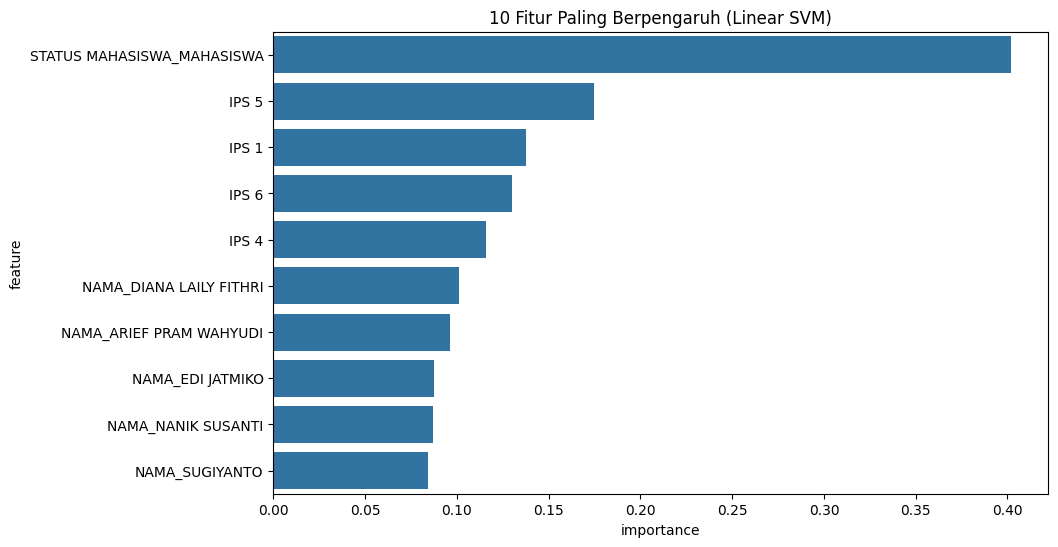


📉 ANALISIS MAHASISWA IPK RENDAH

🎯 KESIMPULAN UMUM
Model terbaik: SVC
Accuracy model terbaik: 0.8684
Berdasarkan analisis model:
- Fitur-fitur tertentu memiliki pengaruh signifikan terhadap prediksi kelulusan
- Model dapat digunakan untuk identifikasi mahasiswa berisiko tidak lulus


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("🔍 INTERPRETASI MODEL")

# 1. Fitur Paling Berpengaruh (untuk model linear)
if hasattr(best_model, 'coef_'):
    print("\n📊 FITUR PALING BERPENGARUH (Linear SVM):")
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': abs(best_model.coef_[0])
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    print(feature_importance.head(10))

    # Visualisasi feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('10 Fitur Paling Berpengaruh (Linear SVM)')
    plt.show()
else:
    print("\nℹ️ Model RBF tidak memiliki coefficient untuk interpretasi feature importance langsung")

# 2. Analisis Mahasiswa IPK Rendah
print("\n📉 ANALISIS MAHASISWA IPK RENDAH")
if 'IPK' in df.columns:
    # Cari threshold IPK rendah (misalnya bawah 25% percentile)
    ipk_threshold = df['IPK'].quantile(0.25)
    low_gpa_students = df[df['IPK'] <= ipk_threshold]

    print(f"Threshold IPK rendah: ≤ {ipk_threshold:.2f}")
    print(f"Jumlah mahasiswa IPK rendah: {len(low_gpa_students)}")

    if len(low_gpa_students) > 0:
        # Ensure 'STATUS KELULUSAN' is used, not 'Status_Kelulusan'
        graduation_rate_low_gpa = (low_gpa_students['STATUS KELULUSAN'] ==
                                  le.inverse_transform([1])[0]).mean()
        print(f"Tingkat kelulusan mahasiswa IPK rendah: {graduation_rate_low_gpa:.2%}")

        # Bandingkan dengan overall rate
        # Ensure 'STATUS KELULUSAN' is used, not 'Status_Kelulusan'
        overall_graduation_rate = (df['STATUS KELULUSAN'] ==
                                 le.inverse_transform([1])[0]).mean()
        print(f"Tingkat kelulusan overall: {overall_graduation_rate:.2%}")

        if graduation_rate_low_gpa < overall_graduation_rate:
            print("✅ Konfirmasi: Mahasiswa IPK rendah cenderung tidak lulus")
        else:
            print("❌ Tidak terbukti: Mahasiswa IPK rendah justru lebih tinggi kelulusannya")

# 3. Kesimpulan Umum
print("\n🎯 KESIMPULAN UMUM")
print(f"Model terbaik: {type(best_model).__name__}")
print(f"Accuracy model terbaik: {max(acc_linear, acc_rbf):.4f}")
print("Berdasarkan analisis model:")
print("- Fitur-fitur tertentu memiliki pengaruh signifikan terhadap prediksi kelulusan")
print("- Model dapat digunakan untuk identifikasi mahasiswa berisiko tidak lulus")

In [ ]:
print("🚀 DEPLOYMENT FUNGSI PREDICT")

def predict_status(IPK, Total_SKS, Umur, Lama_Studi, **kwargs):
    """
    Fungsi untuk memprediksi status kelulusan mahasiswa

    Parameters:
    - IPK: Indeks Prestasi Kumulatif
    - Total_SKS: Total SKS yang diambil
    - Umur: Usia mahasiswa
    - Lama_Studi: Lama studi dalam semester
    - kwargs: fitur tambahan lainnya
    """

    # Buat dataframe dari input
    input_data = {
        'IPK': [IPK],
        'Total_SKS': [Total_SKS],
        'Umur': [Umur],
        'Lama_Studi': [Lama_Studi]
    }

    # Tambahkan fitur tambahan jika ada
    for key, value in kwargs.items():
        input_data[key] = [value]

    input_df = pd.DataFrame(input_data)

    # Pastikan urutan kolom sama dengan training
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0  # Isi default untuk kolom yang missing

    input_df = input_df[X.columns]

    # Preprocessing: scaling
    input_scaled = scaler.transform(input_df)

    # Prediction
    prediction_encoded = best_model.predict(input_scaled)[0]
    prediction_label = le.inverse_transform([prediction_encoded])[0]

    # Probability (jika supported)
    if hasattr(best_model, 'decision_function'):
        confidence = best_model.decision_function(input_scaled)[0]
        confidence_percent = 1 / (1 + np.exp(-confidence))  # Convert to probability-like score
    else:
        confidence_percent = 0.5  # Default confidence

    return prediction_label, confidence_percent

# Test fungsi predict
print("\n🧪 TEST FUNGSI PREDICT")
try:
    # Contoh penggunaan
    result, confidence = predict_status(
        IPK=3.2,
        Total_SKS=144,
        Umur=22,
        Lama_Studi=8
    )
    print(f"Contoh prediksi 1: {result} (confidence: {confidence:.2f})")

    result2, confidence2 = predict_status(
        IPK=2.5,
        Total_SKS=120,
        Umur=24,
        Lama_Studi=10
    )
    print(f"Contoh prediksi 2: {result2} (confidence: {confidence2:.2f})")

    print("\n✅ Fungsi predict_status berhasil dibuat!")

except Exception as e:
    print(f"❌ Error: {e}")

🚀 DEPLOYMENT FUNGSI PREDICT

🧪 TEST FUNGSI PREDICT


/tmp/ipython-input-2255436493.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0  # Isi default untuk kolom yang missing
/tmp/ipython-input-2255436493.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0  # Isi default untuk kolom yang missing
/tmp/ipython-input-2255436493.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

Contoh prediksi 1: TERLAMBAT (confidence: 0.86)
Contoh prediksi 2: TERLAMBAT (confidence: 0.86)

✅ Fungsi predict_status berhasil dibuat!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
